### Comparative Analysis of Speech Feature Extraction Techniques
#### Theory
Speech signal processing is a critical area in audio analysis, enabling the extraction of meaningful features from raw audio data for various applications such as speech recognition, speaker identification, and emotion detection. This lab focuses on the following key concepts:
1. **MFCC (Mel-Frequency Cepstral Coefficients):**
	- MFCCs are widely used features in speech processing that represent the short-term power spectrum of a sound.
	- They are computed by mapping the power spectrum onto the mel scale, taking the logarithm, and applying the discrete cosine transform (DCT).
	- MFCCs capture the perceptual characteristics of speech, making them effective for tasks like speech recognition.
2. **LPC (Linear Predictive Coding):**
	- LPC is a method for encoding the spectral envelope of a digital signal.
	- It models the speech signal as a linear combination of its past samples, providing a compact representation of the signal.
	- LPC coefficients are useful for speaker recognition and speech synthesis.
3. **PLP (Perceptual Linear Prediction):**
	- PLP is an extension of LPC that incorporates perceptual aspects of human hearing.
	- It uses a filterbank to model the critical bands of hearing and applies a loudness compression step.
	- PLP features are robust to noise and are commonly used in speech analysis.
4. **Filterbank Energies:**
	- Filterbank energies are derived from the power spectrum of the signal, using a set of overlapping filters spaced on the mel scale.
	- These energies serve as the foundation for computing MFCCs and PLP features.
#### Objectives
The primary objectives of this lab are as follows:
1. To understand and implement feature extraction techniques for speech signals, including MFCC, LPC, and PLP.
2. To analyze the waveform and extracted features visually using plots.
3. To explore the relationship between different feature representations and their applications in speech processing tasks.
4. To gain hands-on experience with Python libraries such as `librosa` and `python_speech_features` for audio analysis.
5. To develop an understanding of how these features can be used in real-world applications like speech recognition and speaker identification.

In [22]:
import librosa
y, sr = librosa.load("speeches/sample.wav", sr=16000)


In [17]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print(mfcc.shape)

(13, 186)


In [18]:
lpc_order = 12
lpc = librosa.lpc(y, order=lpc_order)
print(lpc.shape)

(13,)


In [19]:
from python_speech_features import logfbank
import numpy as np

filterbank_energies = logfbank(y, samplerate=sr, nfilt=26)

plp = np.dot(filterbank_energies, np.linalg.pinv(np.eye(filterbank_energies.shape[1])))
print(plp.shape)

(593, 26)


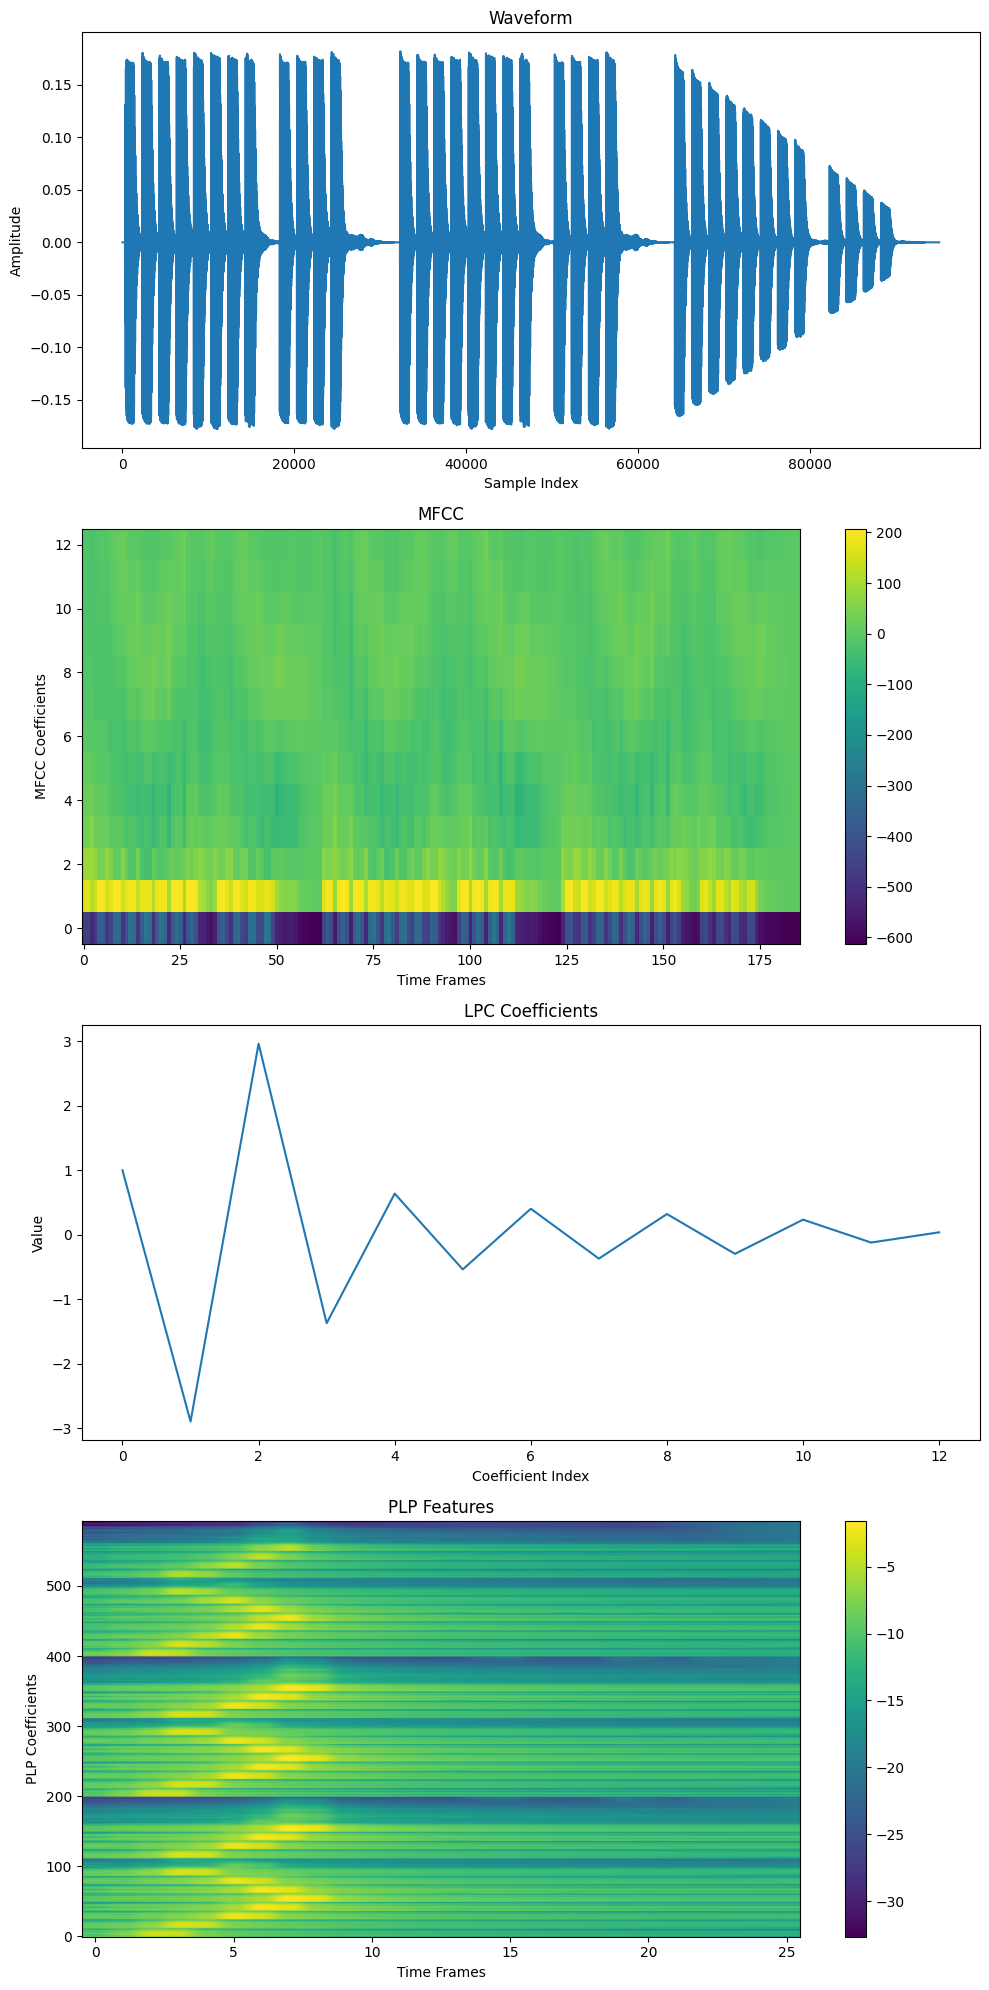

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 20))

plt.subplot(4, 1, 1)
plt.plot(y)
plt.title("Waveform")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 2)
plt.imshow(mfcc, aspect="auto", origin="lower", cmap="viridis")
plt.title("MFCC")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficients")
plt.colorbar()

plt.subplot(4, 1, 3)
plt.plot(lpc)
plt.title("LPC Coefficients")
plt.xlabel("Coefficient Index")
plt.ylabel("Value")

plt.subplot(4, 1, 4)
plt.imshow(plp, aspect="auto", origin="lower", cmap="viridis")
plt.title("PLP Features")
plt.xlabel("Time Frames")
plt.ylabel("PLP Coefficients")
plt.colorbar()

plt.tight_layout()